# Lancés de pièce

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import matplotlib.lines as lines
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
df = pd.read_csv("akinator_.csv")
dftot = pd.DataFrame(df[df.columns[1:]].stack())

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30 non-null     object 
 1   Groupe 1    30 non-null     object 
 2   Groupe 2    30 non-null     object 
 3   Groupe 3    30 non-null     object 
 4   Groupe 4    30 non-null     float64
 5   Groupe 5    30 non-null     int64  
 6   Groupe 6    30 non-null     object 
 7   Groupe 7    30 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ KB


In [4]:
pd.set_option("display.max.columns", None)
#dftot.unstack()
#dftot = dftot.drop(0)

In [5]:
dftot = pd.DataFrame(dftot[0].astype("str").str.replace(",", ".").astype("float")).rename(columns={0: "Distance"})

In [6]:
pop = dftot["Distance"]
pop

0   Groupe 1   -51.0
    Groupe 2    30.0
    Groupe 3    20.0
    Groupe 4     0.0
    Groupe 5    23.0
                ... 
29  Groupe 3   -29.0
    Groupe 4    50.0
    Groupe 5    10.0
    Groupe 6   -51.5
    Groupe 7    -5.5
Name: Distance, Length: 210, dtype: float64

## La distribution de 210 mesures à 3m

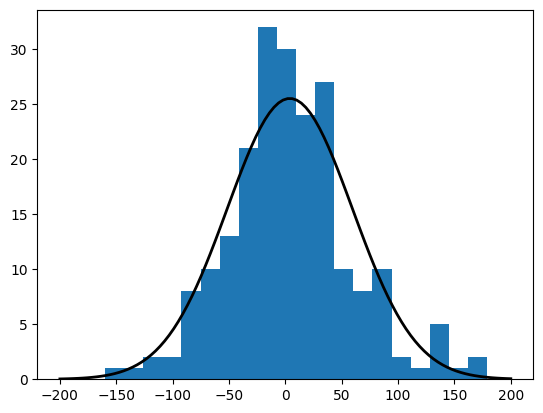

In [7]:
N = len(pop)
num_bins = 20
plt.hist(pop, bins=num_bins)

x = np.linspace(-200, 200, 100)
bin_width = (pop.max() - pop.min()) / num_bins
p = norm.pdf(x, pop.mean(), pop.std())* N * bin_width
plt.plot(x, p, 'k', linewidth=2);

## La densité de probabilité

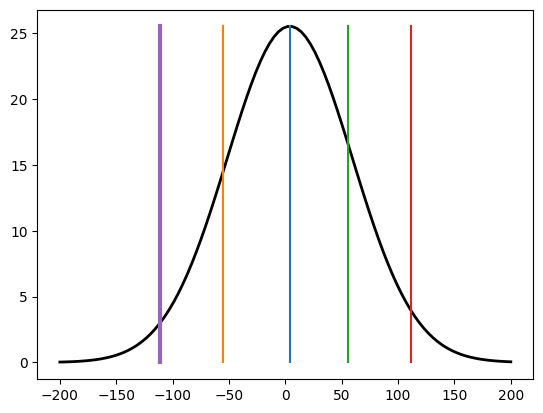

In [8]:
N = len(pop)
num_bins = 20
#plt.hist(pop, bins=num_bins)

x = np.linspace(-200, 200, 100)
bin_width = (pop.max() - pop.min()) / num_bins
p = norm.pdf(x, pop.mean(), pop.std()) * N * bin_width
plt.plot(x, p, 'k', linewidth=2)
plt.plot([3.9680952380952377, 3.9680952380952377],[0, np.max(p)])
plt.plot([-55.61843504566346, -55.61843504566346],[0, np.max(p)])
plt.plot([55.61843504566346, 55.61843504566346],[0, np.max(p)]);
plt.plot([55.61843504566346 * 2, 55.61843504566346 * 2],[0, np.max(p)]);
plt.plot([-55.61843504566346*2, -55.61843504566346*2],[0, np.max(p)], linewidth=3)

## La probabilité cumulée

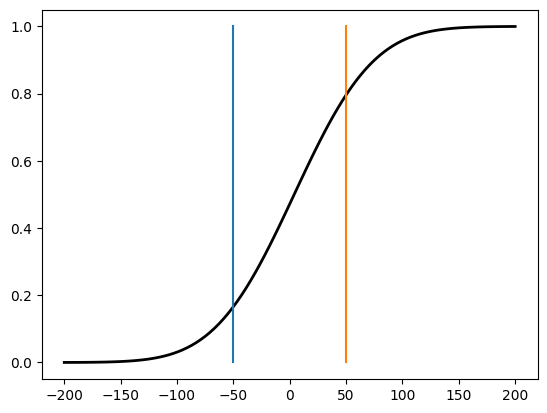

In [9]:
N = len(pop)
num_bins = 20
#plt.hist(pop, bins=num_bins)

x = np.linspace(-200, 200, 100)
bin_width = (pop.max() - pop.min()) / num_bins
p = norm.cdf(x, pop.mean(), pop.std()) #* N * bin_width
plt.plot(x, p, 'k', linewidth=2)
plt.plot([-50,-50],[0, np.max(p)])
plt.plot([50,50],[0, np.max(p)])

Probabilité que ma mesure soit < -50cm

In [10]:
pmin = norm(pop.mean(), pop.std()).cdf(-50)
pmin*100

16.594164500702526

Probabilité que ma mesure soit < 50cm

In [11]:
pmax = norm(pop.mean(), pop.std()).cdf(50)
pmax*100

79.60620991919123

Probabilité que ma mesure soit > -50cm et < 50cm

In [12]:
(pmax - pmin)*100

63.012045418488704

Probabilité que ma mesure soit > 50cm

In [13]:
1 - pmax

0.2039379008080877

La mesure seuil correspondant à une probabilité de 30%

In [14]:
norm(pop.mean(), pop.std()).ppf(0.3)

-25.19824061586955

## Les grandeurs stats de la population à 3m.

In [15]:
sigma = dftot["Distance"].std()
sigma

55.61843504566346

In [16]:
ste = dftot["Distance"].std() / np.sqrt(210)
ste

3.8380366489532154

In [17]:
mean = dftot["Distance"].mean()
mean

3.9680952380952377

In [18]:
print(type(dftot))
print(type(pop))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


## P-Value

### Démarche pour invalider une hypothèse nulle H0

- Ha : Vous êtes moins précis pour jeter un pièce exactement à 10m, plutôt qu'a 3m.
- Mise en place de l'expérience: Vous lancez tous 2 pièces à 10m.
- Moyenne des lancés qui est de 25cm.
- N = 42

H0 : Vous êtes aussi précis peut importe la distance.

Si H0 est vérifiée:
- La moyenne devrait être de 3.96cm
- L'écart type devrait être de 55.6cm.
- L'erreur standard est de 8.58cm.

In [36]:
s = sigma / np.sqrt(42)

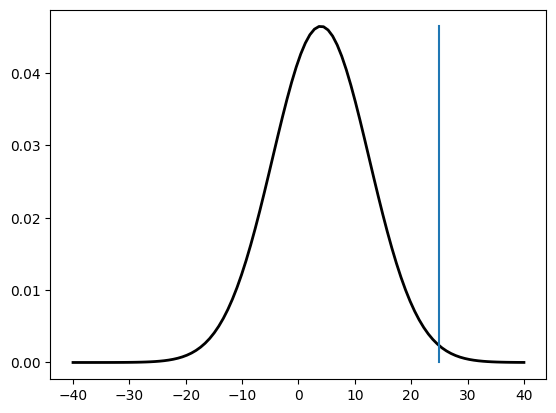

In [20]:
N = 42
num_bins = 20
#plt.hist(pop, bins=num_bins)

x = np.linspace(-40, 40, 100)
p = norm.pdf(x, mean, sigma / np.sqrt(42)) #* N * bin_width
plt.plot(x, p, 'k', linewidth=2)
plt.plot([norm(mean,s )],[])
plt.plot([25,25],[0, np.max(p)]);


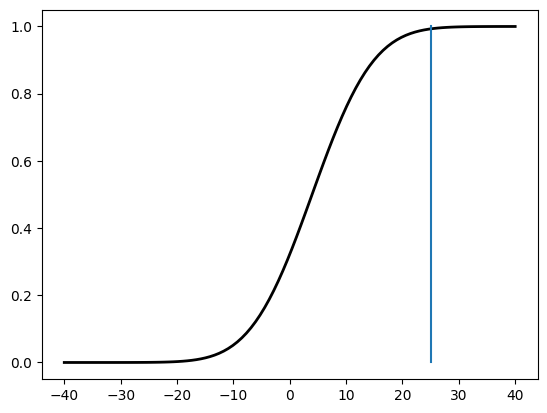

In [21]:
N = 42
num_bins = 20
#plt.hist(pop, bins=num_bins)

x = np.linspace(-40, 40, 100)
p = norm.cdf(x, mean, sigma / np.sqrt(42)) #* N * bin_width
plt.plot(x, p, 'k', linewidth=2)
plt.plot([25,25],[0, np.max(p)]);
#plt.plot([50,50],[0, np.max(p)]);

In [22]:
(1 - norm(mean, sigma / np.sqrt(42)).cdf(25)) * 100

0.7129569445270767

Probabilité de trouver la mesure 25cm si l'H0 est de 7%.
7% est appelée __p-value__

Pour un seuil à alpha 5% on ne peut pas rejeter l'hypothèse nulle. Donc on ne peut pas prouver que changer la distance impacte le resultat dans cet exemple

## Votre tour : Calculer la p-value

- Calculer les p-value pour les mesures faites à 1m, 2m, 4m, 5m, 6m
- Tracer l'évolution de la p-value en fonction de la distance
- Optionnel: Si les points semblent suivre une tendance. Définir cette tendance et en déduire à partir de quel distance on ne peut plus reje

In [23]:
df_ = pd.read_csv("akinator IA3 - Feuille 4.csv")
pd.set_option("display.max.columns", None)

df2 = df_.transpose()
df2.index = list(range(len(df2.index)))
df2.pop(0)
df2.rename(columns={3:4, 4:5, 5:6}, inplace = True)
df2 = df2.astype(str)
df2 = df2.applymap(lambda x: x.replace(",","."))
df2 = df2.astype(float)
df2 = df2.drop(0)

- df_total = df2.stack()
- df_total = pd.DataFrame(df_total)
- plt.hist(df_total, bins = 100);
- my_bins = 20
- plt.hist(df2[1], bins = my_bins);

5.226190476190476
8.582110847194887
la valeur-p qui est de: 44.17258181129237% est supérieure au seuil de 5%, on ne rejette donc pas l’hypothèse nulle


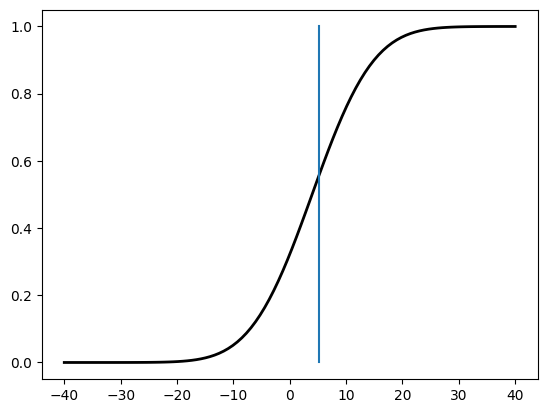

In [24]:
m1 = df2[1]
m1_mean = m1.mean()
print(m1_mean)
ste_h0 = sigma / np.sqrt(42)
print(ste_h0)
N = 42
num_bins = 20
#plt.hist(pop, bins=num_bins)

x = np.linspace(-40, 40, 100)
p = norm.cdf(x, mean, sigma / np.sqrt(42)) #* N * bin_width
plt.plot(x, p, 'k', linewidth=2)
plt.plot([m1_mean,m1_mean],[0, np.max(p)])
p_value1 = (1 - norm(mean, sigma / np.sqrt(42)).cdf(m1_mean)) * 100
print(f"la valeur-p qui est de: {p_value1}% est supérieure au seuil de 5%, on ne rejette donc pas l’hypothèse nulle")

la valeur-p qui est de: 79.64855218680928% est supérieure au seuil de 5%, on ne rejette donc pas l’hypothèse nulle


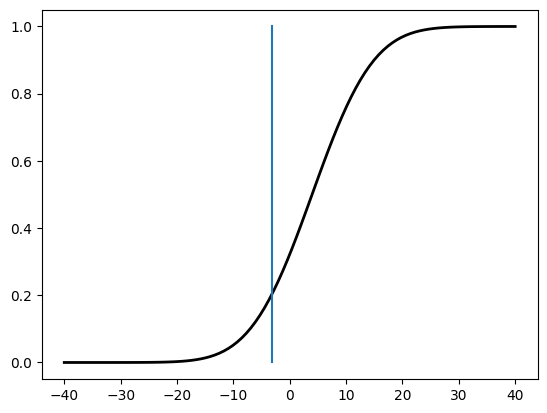

In [25]:
m2 = df2[2]
m2_mean = m2.mean()
sigma / np.sqrt(42)
x = np.linspace(-40,40,100)
p = norm.cdf(x, mean, sigma / np.sqrt(42))
plt.plot(x, p, 'k', linewidth=2)
plt.plot([m2_mean, m2_mean], [0, np.max(p)])
p_value2 = (1 - norm(mean, sigma / np.sqrt(42)).cdf(m2_mean)) * 100
print(f"la valeur-p qui est de: {p_value2}% est supérieure au seuil de 5%, on ne rejette donc pas l’hypothèse nulle")

la valeur-p qui est de: 28.86972815358504% est supérieure au seuil de 5%, on ne rejette donc pas l’hypothèse nulle


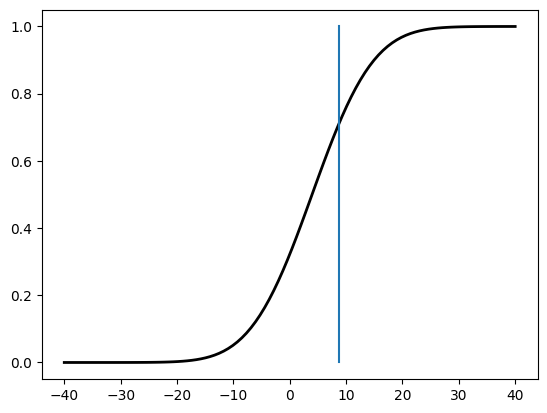

In [26]:
m4 = df2[4]
m4_mean = m4.mean()
n = 42
x = np.linspace(-40,40,100)
p = norm.cdf(x, mean, sigma / np.sqrt(n))
plt.plot(x, p, "k", linewidth=2)
plt.plot([m4_mean, m4_mean], [0, np.max(p)])
p_value4 = (1 - norm(mean, sigma / np.sqrt(n)).cdf(m4_mean)) * 100
print(f"la valeur-p qui est de: {p_value4}% est supérieure au seuil de 5%, on ne rejette donc pas l’hypothèse nulle")


la valeur-p qui est de: 0.003641683391897299% est inférieur au seuil de 5%, on rejette donc l’hypothèse nulle.
 Jetez à une distance de 5m plûtot qu'à 3 peu en effet produire un changement de distance


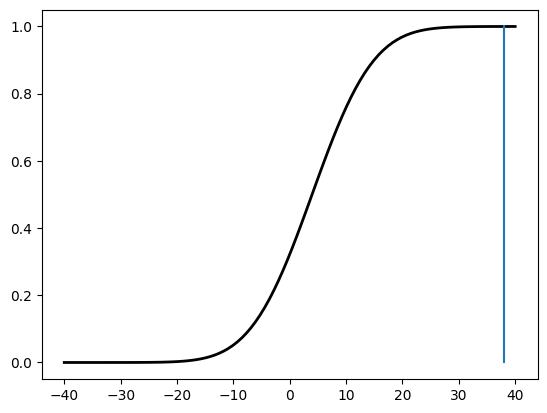

In [27]:
m5 = df2[5]
m5_mean = m5.mean()
n = 42
x = np.linspace(-40, 40, 100)
p = norm.cdf(x, mean, sigma / np.sqrt(n))
plt.plot(x, p, 'k', linewidth=2)
plt.plot([m5_mean, m5_mean],[0, np.max(p)])
p_value5 = (1 - norm(mean, sigma / np.sqrt(n)).cdf(m5_mean)) * 100
print(f"la valeur-p qui est de: {p_value5}% est inférieur au seuil de 5%, on rejette donc l’hypothèse nulle.\n Jetez à une distance de 5m plûtot qu'à 3 peu en effet produire un changement de distance")


la valeur-p qui est de: 28.86972815358504% est supérieure au seuil de 5%, on ne rejette donc pas l’hypothèse nulle


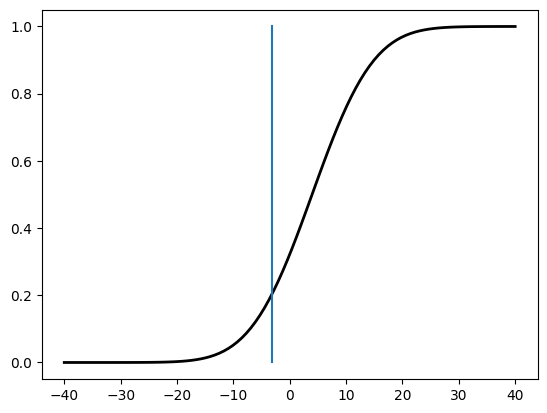

In [28]:
m6 = df2[6]
m6_mean = m6.mean()
n = 42 
x = np.linspace(-40, 40, 100)
p = norm.cdf(x, mean, sigma / np.sqrt(n))
plt.plot(x, p, 'k', linewidth=2)
plt.plot([m6_mean, m6_mean], [0, np.max(p)])
p_value6 = (1 - norm(mean, sigma / np.sqrt(n)).cdf(m6_mean)) * 100
print(f"la valeur-p qui est de: {p_value4}% est supérieure au seuil de 5%, on ne rejette donc pas l’hypothèse nulle")


In [29]:
norm(m1.mean(), m1.std()).ppf(0.3)

-9.534724926610672

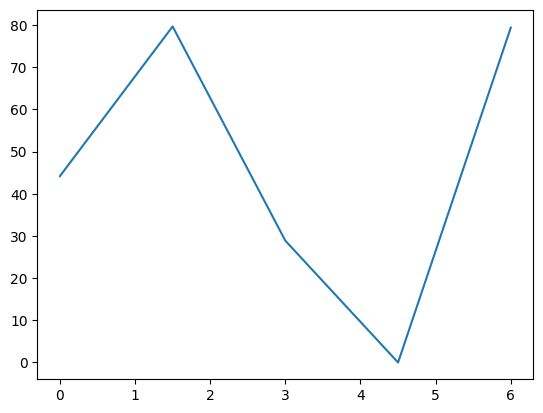

In [30]:
s = pd.Series([p_value1, p_value2, p_value4, p_value5, p_value6])
x = np.linspace(0, 6, 5)
plt.plot(x, s)


In [31]:
m1_std = m1.std()
m2_std = m2.std()
m4_std = m4.std()
m5_std = m5.std()
m6_std = m6.std()

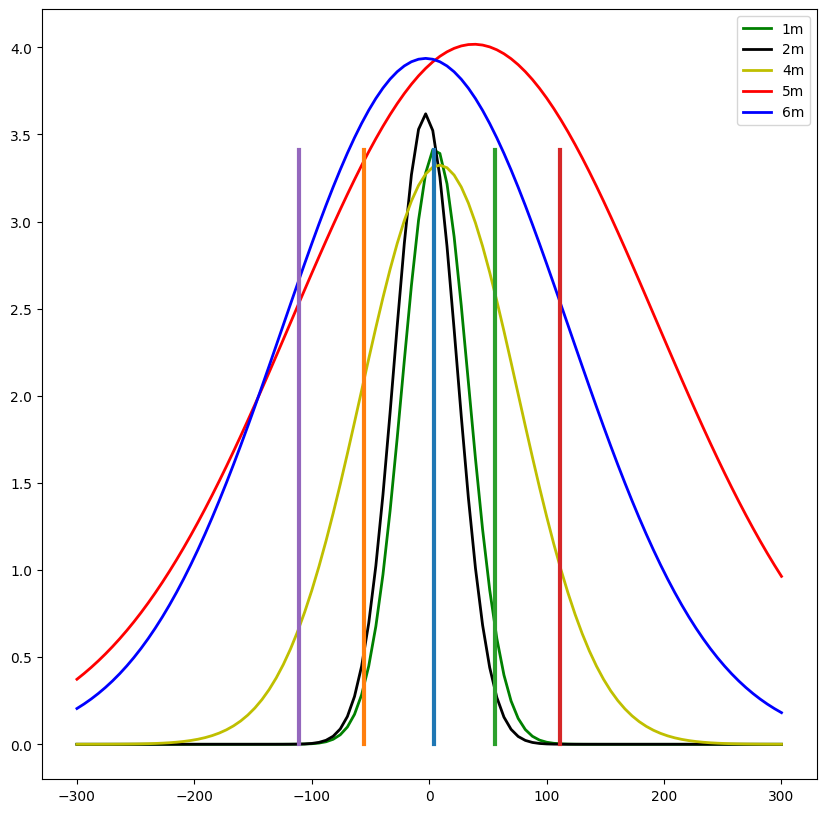

In [32]:
N = 42
num_bins = 20
bin_widths = (m1.max() - m1.min()) / num_bins
bin_widths2 = (m2.max() - m2.min()) / num_bins
bin_widths4 = (m4.max() - m4.min()) / num_bins
bin_widths5 = (m5.max() - m5.min()) / num_bins
bin_widths6 = (m6.max() - m6.min()) / num_bins


fig, ax = plt.subplots(figsize=(10, 10))
#x1 = np.linspace(-200,200,100)
x = np.linspace(-300, 300, 100)
p = norm.pdf(x, m1_mean, m1_std)* N * bin_widths
p2 = norm.pdf(x, m2_mean, m2_std)* N * bin_widths2
p4 = norm.pdf(x, m4_mean, m4_std)* N * bin_widths4
p5 = norm.pdf(x, m5_mean, m5_std)* N * bin_widths5
p6 = norm.pdf(x, m6_mean, m6_std)* N * bin_widths6

ax.plot(x, p, 'g', linewidth=2, label="1m")
ax.plot(x, p2, 'k', linewidth=2, label="2m")
ax.plot(x, p4, 'y', linewidth=2, label="4m")
ax.plot(x, p5, 'r', linewidth=2, label="5m")
ax.plot(x, p6, 'b', linewidth=2, label="6m")
ax.legend()
plt.plot([3.9680952380952377, 3.9680952380952377],[0, np.max(p)], linewidth=3)
plt.plot([-55.61843504566346, -55.61843504566346],[0, np.max(p)], linewidth=3)
plt.plot([55.61843504566346, 55.61843504566346],[0, np.max(p)], linewidth=3);
plt.plot([55.61843504566346 * 2, 55.61843504566346 * 2],[0, np.max(p)], linewidth=3);
plt.plot([-55.61843504566346*2, -55.61843504566346*2],[0, np.max(p)], linewidth=3)

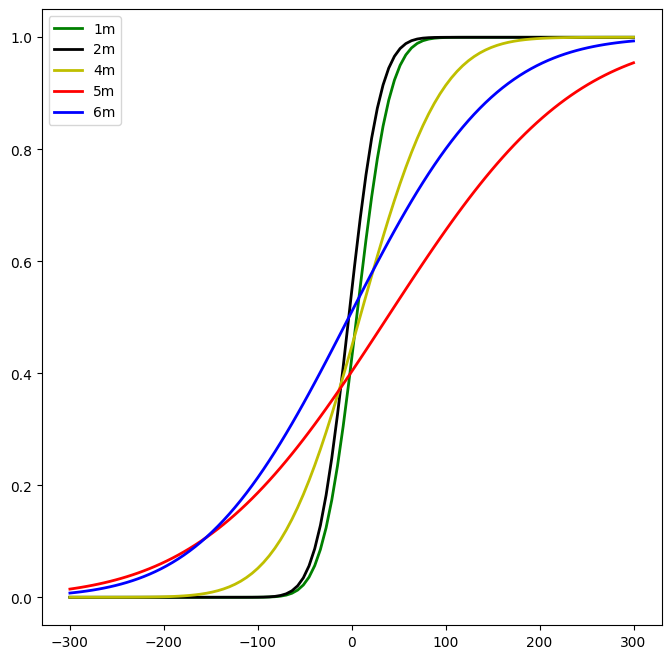

In [33]:
N = 42
num_bins = 20
bin_widths = (m1.max() - m1.min()) / num_bins
bin_widths2 = (m2.max() - m2.min()) / num_bins
bin_widths4 = (m4.max() - m4.min()) / num_bins
bin_widths5 = (m5.max() - m5.min()) / num_bins
bin_widths6 = (m6.max() - m6.min()) / num_bins


fig, ax = plt.subplots(figsize=(8,8))
#x1 = np.linspace(-200,200,100)
x = np.linspace(-300, 300, 100)
p = norm.cdf(x, m1_mean, m1_std)#* N * bin_widths
p2 = norm.cdf(x, m2_mean, m2_std)#* N * bin_widths2
p4 = norm.cdf(x, m4_mean, m4_std)#* N * bin_widths4
p5 = norm.cdf(x, m5_mean, m5_std)#* N * bin_widths5
p6 = norm.cdf(x, m6_mean, m6_std)#* N * bin_widths6

ax.plot(x, p, 'g', linewidth=2, label="1m")
ax.plot(x, p2, 'k', linewidth=2, label="2m")
ax.plot(x, p4, 'y', linewidth=2, label="4m")
ax.plot(x, p5, 'r', linewidth=2, label="5m")
ax.plot(x, p6, 'b', linewidth=2, label="6m")
ax.legend()

In [34]:
print(m1_mean)
print(m2_mean)
print(m4_mean)
print(m5_mean)
print(m6_mean)

5.226190476190476
-3.1476190476190475
8.75
38.01190476190476
-3.0714285714285716


In [35]:
-5*2

-10